In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sympy import *
import csv
import re
import math

Imagem escolhida aleatoriamente foi: Pear_124.jpg 



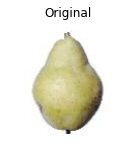


Que é classificada originalmente como: Pera 

O algoritimo classificou como: Pera 

Acurácia: 100.00%

Predição  Pera  All
True               
Pera         1    1
All          1    1

Para um(a) Pera de tamanho médio você terá aproximadamente: 0.38 g de proteina, 
 15.46 g de carboidratos, 3.1 g de fibras, 9.8 g de açucar e 0.12 g de gorduras totais.


In [ ]:
#PASSAR POR CADA IMAGEM

diretorio = "/content/drive/Othercomputers/Meu computador/Data_set_Frutas_2/dados/"

arquivos = os.listdir(diretorio) #Gerar uma lista aleatoria
arquivos.sort() #Ordenar a lista

#Função de tratamento de imagem-----------------------------------------------------
def imagem(nome_imagem, diretorio):
  img = cv.imread('/content/drive/Othercomputers/Meu computador/Data_set_Frutas_2/dados/' + diretorio + '/' + nome_imagem)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  #Tratamento das imagens
  kernel = np.ones((5,5),np.uint8)
  mask2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

  img2 = cv.medianBlur(img, 9)
  img2 = cv.morphologyEx(img2,cv.MORPH_CLOSE, kernel, iterations=1)

  #Obteção das bordas e tratamento
  img7 = cv.Canny(img2, 50, 255)
  #kernel2 = np.ones((2,2),np.uint8)
  #img7 = cv.dilate(img7,kernel2,iterations=1) Para imagens mais detalhistas


  #Obtençao do contorno
  contornos, ordem = cv.findContours(img7, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  contorno = contornos[0]

  #Obter maior contorno figura original
  for i in range(0, len(contornos)):
      if len(contorno) < len(contornos[i]):
       contorno = contornos[i]

  #Obtenção dos descritores

  #Calcular o perimetro
  perimetro = cv.arcLength(contorno, True)

  #Calcular o diametro
  diametro = np.sqrt(4*cv.contourArea(contorno)/np.pi)

  #Calcular a área
  area = cv.countNonZero(img7)

  #Compacidade -> O quão redondo é uma imagem
  compacidade = np.square(perimetro)/area

  #Excentricidade
  (x,y), (eixoMenor, eixoMaior), angulo = cv.fitEllipse(contorno)
  excentricidade2 = eixoMaior/eixoMenor
  excentricidade = round(eixoMaior/eixoMenor, 4)

  return(perimetro, area, compacidade, excentricidade, diametro)

#Fim da função---------------------------------------------------------------------------------------

#Começo do codigo------------------------------------------------------------------------------------
#Abrir o arquivo
with open('/content/drive/Othercomputers/Meu computador/Data_set_Frutas_2/finformation2.csv', 'w') as f:

  #Create the csv writer
  writer = csv.writer(f)
  writer2 = csv.DictWriter(f, fieldnames=['#','Classificacao','Perimetro', 'Area', 'Compacidade', 'Excentricidade', 'Diametro']) #Titulos

  #Escrever cabeçalho
  writer2.writeheader()
  #Estrutura de repitição
  for arquivo in arquivos:

    #Rodar as pastas com cada imagem
    if arquivo == 'apple':
      arquivos = os.listdir(diretorio + 'apple')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'apple')
        writer.writerow([arquivo] + ['Maca'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'banana':
      arquivos = os.listdir(diretorio + 'banana')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'banana')
        writer.writerow([arquivo] + ['Banana'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'kiwi':
      arquivos = os.listdir(diretorio + 'kiwi')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'kiwi')
        writer.writerow([arquivo] + ['Kiwi'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'lemon':
      arquivos = os.listdir(diretorio + 'lemon')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'lemon')
        writer.writerow([arquivo] + ['Limao'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'tangerine':
      arquivos = os.listdir(diretorio + 'tangerine')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'tangerine')
        writer.writerow([arquivo] + ['Tangerina'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'mango':
      arquivos = os.listdir(diretorio + 'mango')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'mango')
        writer.writerow([arquivo] + ['Manga'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'orange':
      arquivos = os.listdir(diretorio + 'orange')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'orange')
        writer.writerow([arquivo] + ['Laranja'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'papaya':
      arquivos = os.listdir(diretorio + 'papaya')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'papaya')
        writer.writerow([arquivo] + ['Mamao'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'pear':
      arquivos = os.listdir(diretorio + 'pear')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'pear')
        writer.writerow([arquivo] + ['Pera'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'pineapple':
      arquivos = os.listdir(diretorio + 'pineapple')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'pineapple')
        writer.writerow([arquivo] + ['Abacaxi'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'plum':
      arquivos = os.listdir(diretorio + 'plum')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'plum')
        writer.writerow([arquivo] + ['Ameixa'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])

    if arquivo == 'strawberry':
      arquivos = os.listdir(diretorio + 'strawberry')
      arquivos.sort(key=lambda s: int(re.search(r'\d+', s).group()))
      for arquivo in arquivos:
        perimetro, area, compacidade, excentricidade, diametro = imagem(arquivo, 'strawberry')
        writer.writerow([arquivo] + ['Morango'] + [int(perimetro)] + [area] + [round(compacidade)] + [excentricidade] + [int(diametro)])


#Reconhecimento de padrões do arquivo CSV
dados = pd.read_csv('/content/drive/Othercomputers/Meu computador/Data_set_Frutas_2/finformation2.csv', sep=',')
dados.describe()

#Separar características de classes
X = dados.iloc[:,2:7] #Características, que são tudo que ta no eixo Y das posições 2,3,4,5 menos a 1 e 6
Y = dados.iloc[:, 1] #Classes, que são tudo que tao no eixo Y da posição 1 do eixo X da matriz mãe de dados (CSV)

#Normalização do conjunto de dados
normalizar = StandardScaler()
normalizar.fit(X)
X = normalizar.transform(X)

#Dividir o conjunto em treinamento (TRAIN) e teste (TEST)
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.00049) #Separar 1 só

#Classificador KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(XTrain, YTrain)
Y = knn.predict(XTest)

#Pegar o valor escolhido aleatorio
escolha = YTest.to_string()
escolha = escolha.split()
numero_Index = int(escolha[0])
nome_Fruta = escolha[1]

#Abrir arquivo para pegar o valor da celula
nome_ImagemF = dados.loc[numero_Index, '#']
diretorioF = nome_ImagemF.split('_')
diretorioF = diretorioF[0].lower()

#Prints de comprovação para o usuário
print('Imagem escolhida aleatoriamente foi:', nome_ImagemF , '\n')

img = cv.imread('/content/drive/Othercomputers/Meu computador/Data_set_Frutas_2/dados/' + diretorioF + '/' + nome_ImagemF)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(img), plt.axis('off'), plt.title('Original')
plt.show()

print('\nQue é classificada originalmente como:', nome_Fruta, '\n')
print('O algoritimo classificou como:', Y[0], '\n')

#Acurácia
acc = accuracy_score(YTest,Y)
print('Acurácia: {0:.2f}%\n'.format(acc*100))

#Matriz de confusão
print(pd.crosstab(YTest,Y,rownames=['True'],colnames=['Predição'],margins=True))

#Pegar os valores nutricionais
valores = pd.read_csv('/content/drive/Othercomputers/Meu computador/Data_set_Frutas_2/fruits_values.csv', sep=',')
valores.describe()
fruta_valor = valores.loc[:, 'name']
fruta_valor = fruta_valor.tolist()
nome_ImagemF=nome_ImagemF.split('_')

controle = 0
for un in fruta_valor:
  if nome_ImagemF[0] in un:
    index = fruta_valor.index(un)
    controle += 1

if controle == 1:
  print('\nPara um(a)',nome_Fruta,'de tamanho médio você terá aproximadamente:',
  valores.loc[index,'protein (g)'] ,'g de proteina, \n',
  valores.loc[index,'carbohydrates (g)'],'g de carboidratos,',
  valores.loc[index,'fiber (g)'],'g de fibras,',
  valores.loc[index,'sugars (g)'],'g de açucar e',
  valores.loc[index,'total fat (g)'],'g de gorduras totais.')
else:
  print('\nPara um(a)',nome_Fruta,'de tamanho médio você terá aproximadamente:',
  valores.loc[index,'protein (g)'] ,'g de proteina, \n',
  valores.loc[index,'carbohydrates (g)'],'g de carboidratos,',
  valores.loc[index,'fiber (g)'],'g de fibras,',
  valores.loc[index,'sugars (g)'],'g de açucar e',
  valores.loc[index,'total fat (g)'],'g de gorduras totais.')
